In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [72]:
non_primed = pd.read_csv("survey-non-primed.csv", encoding="ISO-8859-1")

In [73]:
non_primed = non_primed.rename(columns={'Please Answer': 'confident', 'Unnamed: 10': 'believe', 'Unnamed: 11': 'see_example', 'Unnamed: 12': 'began_with', 'Unnamed: 13': 'experience', "Unnamed: 14":"future", "Think back to a memorable Envision credit. What level of achievement did you pick and HOW did you decide this level of achievement was acceptable?": "memorable_credit", "How many years of experience do you have in the construction/engineering industry?": "years_experience", "Please include your name (This is for the PDH certificate. Your responses are kept confidential)": "name"})

In [71]:
len(non_primed)

26

In [62]:
primed = pd.read_csv("survey-primed.csv", encoding="ISO-8859-1")

Replacing column names

In [63]:
primed = primed.rename(columns={'Please Answer': 'confident', 'Unnamed: 10': 'believe', 'Unnamed: 11': 'see_example', 'Unnamed: 12': 'began_with', 'Unnamed: 13': 'experience', "Unnamed: 14":"future", "Think back to a memorable Envision credit. What level of achievement did you pick and HOW did you decide this level of achievement was acceptable?": "memorable_credit", "How many years of experience do you have in the construction/engineering industry?": "years_experience", "Please include your name (This is for the PDH certificate. Your responses are kept confidential)": "name"})

Removing scores with Nan

In [64]:
primed = primed.dropna(subset = ['name'])

In [65]:
primed.head()

,RespondentID,CollectorID,StartDate,EndDate,IP Address,Email Address,First Name,LastName,Custom Data,confident,believe,see_example,began_with,experience,future,memorable_credit,years_experience,name
0,4137815389,71076472,08/13/2015 16:41:32,08/13/2015 16:47:30,74.203.124.230,NaN,NaN,NaN,NaN,3,3,4,4,3,3,The re-development of the brownfield was proba...,14 years,Robert M Reddick Jr
1,4137806261,71076472,08/13/2015 16:36:51,08/13/2015 16:38:37,74.203.124.230,NaN,NaN,NaN,NaN,Strongly Disagree (1),Strongly Disagree (1),3,3,3,3,pick the one that is most attainable and affor...,3 years,Nick Lowe
2,4137802367,71076472,08/13/2015 16:35:05,08/13/2015 16:38:39,74.203.124.230,NaN,NaN,NaN,NaN,3,3,4,Strongly Agree (5),4,3,I think looking back at the enhancing communit...,16,Tracey McCormick
3,4135833846,71076472,08/12/2015 16:57:30,08/12/2015 16:59:08,66.83.10.189,NaN,NaN,NaN,NaN,4,4,4,4,4,4,Enhancement - working with the community and m...,9 years,Nick Bushon
4,4135833379,71076472,08/12/2015 16:57:10,08/12/2015 16:59:01,66.83.10.189,NaN,NaN,NaN,NaN,3,3,Strongly Agree (5),4,Strongly Agree (5),3,"Restorative, using my experience",9 years,Kate Liu


In [66]:
for i in primed.columns[9:15]:
    primed[i] = primed[i].map({'Strongly Disagree (1)': 1, '2': 2, '3': 3, '4': 4, 'Strongly Agree (5)': 5})

In [67]:
primed['years_experience'] = primed['years_experience'].map(lambda x: x.split()[0]) 

In [68]:
primed.head()

,RespondentID,CollectorID,StartDate,EndDate,IP Address,Email Address,First Name,LastName,Custom Data,confident,believe,see_example,began_with,experience,future,memorable_credit,years_experience,name
0,4137815389,71076472,08/13/2015 16:41:32,08/13/2015 16:47:30,74.203.124.230,NaN,NaN,NaN,NaN,3,3,4,4,3,3,The re-development of the brownfield was proba...,14,Robert M Reddick Jr
1,4137806261,71076472,08/13/2015 16:36:51,08/13/2015 16:38:37,74.203.124.230,NaN,NaN,NaN,NaN,1,1,3,3,3,3,pick the one that is most attainable and affor...,3,Nick Lowe
2,4137802367,71076472,08/13/2015 16:35:05,08/13/2015 16:38:39,74.203.124.230,NaN,NaN,NaN,NaN,3,3,4,5,4,3,I think looking back at the enhancing communit...,16,Tracey McCormick
3,4135833846,71076472,08/12/2015 16:57:30,08/12/2015 16:59:08,66.83.10.189,NaN,NaN,NaN,NaN,4,4,4,4,4,4,Enhancement - working with the community and m...,9,Nick Bushon
4,4135833379,71076472,08/12/2015 16:57:10,08/12/2015 16:59:01,66.83.10.189,NaN,NaN,NaN,NaN,3,3,5,4,5,3,"Restorative, using my experience",9,Kate Liu


Non Pirmed

In [74]:
for i in non_primed.columns[9:15]:
    non_primed[i] = non_primed[i].map({'Strongly Disagree (1)': 1, '2': 2, '3': 3, '4': 4, 'Strongly Agree (5)': 5})

In [84]:
non_primed.years_experience

0                          20
1                           2
2                           1
3                         +20
4                           1
5                          30
6                          17
7                          12
8                         NaN
9                          10
10                         20
11                         16
12                         10
13                   12 years
14                     1 year
15    1.5 years of experience
16                          8
17                          7
18                         13
19                          1
20                         25
21                          8
22                          5
23                          7
24                         20
25                         10
Name: years_experience, dtype: object

In [87]:
non_primed.ix[3, 'years_experience']=20
non_primed.ix[13, 'years_experience']=12
non_primed.ix[14, 'years_experience']=1
non_primed.ix[15, 'years_experience']=2

In [88]:
non_primed.years_experience

0      20
1       2
2       1
3      20
4       1
5      30
6      17
7      12
8     NaN
9      10
10     20
11     16
12     10
13     12
14      1
15      2
16      8
17      7
18     13
19      1
20     25
21      8
22      5
23      7
24     20
25     10
Name: years_experience, dtype: object

In [125]:
#non_primed['years_experience']
non_primed.ix[8, 'years_experience']=0

In [126]:
non_primed['years_experience']= non_primed['years_experience'].map(lambda x: int(x))

In [127]:
non_primed.to_pickle('survey_non_primed_all.pickle')

In [128]:
primed = pd.read_pickle("survey_primed_all.pickle")
non_pirmed = pd.read_pickle("survey_non_primed_all.pickle")

#Mann Whiteney U Tests

In [95]:
from scipy.stats import mannwhitneyu

In [96]:
questions = primed.columns[9:15]
questions

Index(['confident', 'believe', 'see_example', 'began_with', 'experience',
       'future'],
      dtype='object')

In [98]:
for i in questions:
    mann = mannwhitneyu(non_primed[i], primed[i])
    print("{}: {}".format(i, mann))

confident: MannwhitneyuResult(statistic=338.5, pvalue=0.41178003003172237)
believe: MannwhitneyuResult(statistic=347.5, pvalue=0.47723530406925352)
see_example: MannwhitneyuResult(statistic=346.5, pvalue=0.46955387473703358)
began_with: MannwhitneyuResult(statistic=246.0, pvalue=0.025700388253563949)
experience: MannwhitneyuResult(statistic=273.5, pvalue=0.07800743316614106)
future: MannwhitneyuResult(statistic=294.0, pvalue=0.12304067216927878)


#Frequency Particpiants Began with Improved and worked their way up to Restorative 

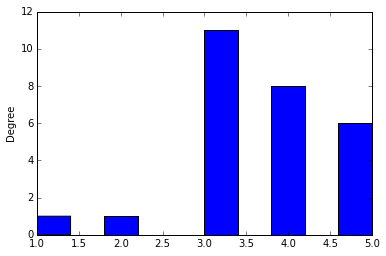

In [143]:
primed= pd.read_csv("survey_primed_cleaned.csv")
primed['began_with'].plot(kind='hist')

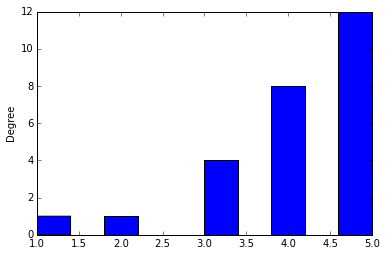

In [144]:
non_primed= pd.read_csv("survey_non_primed_cleaned.csv")
non_primed['began_with'].plot(kind='hist')

#Frequency Particpants Agree a Example Project Would help or did help

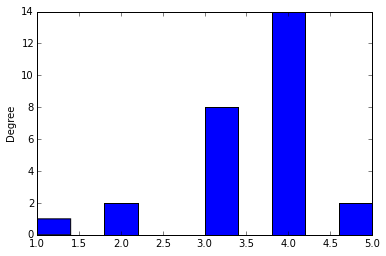

In [145]:
primed['see_example'].plot(kind='hist')

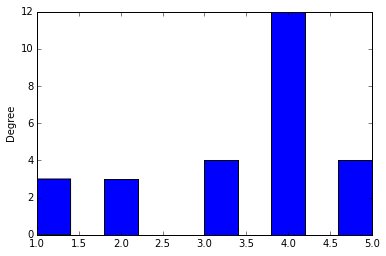

In [146]:
non_primed['see_example'].plot(kind='hist')

#Average years of experience by group

In [120]:
primed.loc[:,'years_experience'].mean()

9.6666666666666661

In [129]:
non_primed.loc[:,'years_experience'].mean()

10.692307692307692